# **RETO - Sistema de Clasificación para predecir el churn de una compañía telco**

![alt_text](https://drive.google.com/uc?export=view&id=1-5Pac1O7lGPToEkQpR7be_3YAuQEN0Fk)




# **Contexto**

En nuestra compañía de telecomunicaciones, la alta competitividad y la amplia oferta de servicios hacen que la retención de clientes sea un desafío crítico. Perder un cliente no solo reduce los ingresos recurrentes, sino que también incrementa los costes de adquisición de nuevos clientes.

**Problemática**

Como equipo de analítica avanzada, buscamos identificar tempranamente a los clientes con mayor probabilidad de abandono (churn). Factores como cargos mensuales elevados, contratos flexibles y una experiencia deficiente en soporte técnico son clave en esta decisión, y anticiparnos a ellos es esencial para diseñar estrategias efectivas de retención.

**Solución Propuesta**

Estamos desarrollando un modelo predictivo de Machine Learning que, con base en datos históricos (tipo de contrato, método de pago, cargos mensuales, entre otros), estime la probabilidad de churn. Este modelo permitirá priorizar acciones estratégicas personalizadas, como:

`Ofertas dirigidas` (descuentos o mejoras en el plan).

`Optimización del servicio` (ajustes proactivos en puntos de fricción).

`Atención prioritaria` (soporte técnico ágil y resolutivo).

De esta forma podremos reducir la tasa de abandono, optimizando recursos y maximizando el valor a largo plazo de los clientes.

# **Dataset**

Este conjunto de datos contiene 7043 registros que fueron clasificados en dos grupos por la variable target `Churn`:

*0 = No abandona la compañía*  
*1 = Abandona la compañía*   

**Información de las características y del target**


*Descripción de las características*

1. **customerID:** ID único que identifica al cliente.
2. **gender:** Indica el género del cliente (masculino o femenino).
3. **SeniorCitizen:** Indica si el cliente es una persona mayor (1: sí, 0: no).
4. **Partner:** Indica si el cliente tiene pareja (Sí o No).
5. **Dependents:** Indica si el cliente tiene personas a su cargo (Sí o No).
6. **tenure:** Número de meses que el cliente ha permanecido con la compañía.
7. **PhoneService:** Indica si el cliente tiene servicio de teléfono (Sí o No).
8. **MultipleLines:** Indica si el cliente tiene múltiples líneas de teléfono (Sí, No o "Sin servicio telefónico").
9. **InternetService:** Proveedor de servicio de Internet del cliente (DSL, Fibra óptica o Ninguno).
10. **OnlineSecurity:** Indica si el cliente tiene seguridad en línea (Sí, No o "Sin servicio de Internet").
11. **OnlineBackup:** Indica si el cliente tiene copia de seguridad en línea (Sí, No o "Sin servicio de Internet").
12. **DeviceProtection:** Indica si el cliente tiene protección de dispositivos (Sí, No o "Sin servicio de Internet").
13. **TechSupport:** Indica si el cliente tiene soporte técnico (Sí, No o "Sin servicio de Internet").
14. **StreamingTV:** Indica si el cliente tiene servicio de TV por streaming (Sí, No o "Sin servicio de Internet").
15. **StreamingMovies:** Indica si el cliente tiene servicio de películas por streaming (Sí, No o "Sin servicio de Internet").
16. **Contract:** Tipo de contrato del cliente (Mensual, un año o dos años).
17. **PaperlessBilling:** Indica si el cliente utiliza facturación electrónica (Sí o No).
18. **PaymentMethod:** Método de pago del cliente (Cheque electrónico, Cheque por correo, Transferencia bancaria automática o Tarjeta de crédito automática).
19. **MonthlyCharges:** Importe cobrado al cliente mensualmente.
20. **TotalCharges:** Importe total cobrado al cliente durante toda su permanencia.






*Descripción del target (Churn)*



0 -> **No churn**    
1 -> **Churn**

#**Plan de Trabajo**

1. **Análisis Exploratorio de Datos (EDA)**
   - Identificación de tipos de variables (categóricas, numéricas, etc.).
   - Detección y manejo de valores faltantes.
   - Análisis de la distribución de la variable objetivo y de las características.
   - Visualizaciones:
     - Análisis de correlaciones.
     - Identificación de outliers.
     - Relación entre variables mediante gráficos.

2. **Modelado Inicial**
   - Preparación de las variables
   - División del conjunto de datos en entrenamiento y prueba (train-test split).
   - Entrenamiento inicial con diversos modelos de ensamble (basados en árboles).

3. **Evaluación Inicial**
   - Evaluación de los modelos entrenados sin ajuste de hiperparámetros.
   - Comparación de métricas de rendimiento.

4. **Optimización de Hiperparámetros**
   - Búsqueda de los mejores hiperparámetros para cada modelo utilizando técnicas como GridSearch.

5. **Entrenamiento del Modelo de Stacking**
   - Creación de un modelo de stacking utilizando los mejores modelos optimizados en pasos anteriores.

6. **Comparación de Resultados**
   - Evaluación y comparación de los resultados de todos los modelos.
   - Selección del modelo con el mejor rendimiento basado en las métricas obtenidas.

7. **Interpretabilidad del Modelo**
   - Variables más relevantes para el modelo (feature importance, SHAP...)
   - Explicar los resultados de las predicciones

8. **Presentación a negocio**
   - 2 slides para explicar los resultados del modelo y los KPI que vamos a medir

**¡A POR ELLO!** 🚀

In [1]:
# Importamos las librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, average_precision_score, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Leemos el dataset
churn = pd.read_csv('https://raw.githubusercontent.com/JimenaAreta/thevalley-MDS/refs/heads/jimena/datasets/Telco_Customer_Churn.csv', sep=',')

# 1. EDA

#### Desarrollo inicial   
1. Creo que podemos eliminar la columna ***customerID***
2. Aparentemente no hay nulos, pero llama la atención que **TotalCharges** la marca como object a pesar de ser el *Importe total cobrado al cliente durante toda su permanencia.*
3. Convirtamos **TotalCharges** a numérico.

In [3]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
churn.drop(columns = 'customerID', inplace = True)

In [5]:
# con este código convertimos a números los valores y deja los errores como nulos.
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'], errors='coerce')

In [6]:
#churn['TotalCharges'].info()
churn.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

4. Vemos como **TotalCharges** ahora tiene 11 nulos, habrá que tratarlos.  
- O bien lo imputamos con la mediana (easy).   
- O bien hacemos agrupaciones y vemos los valores medios con los que imputaremos (medium).  
- O bien entrenamos un modelo para que prediga esos valores nulos (pro).  

#### Imputar nulos con medias grupales

In [7]:
def impute_total_charges(row):
    if pd.isnull(row['TotalCharges']):
        key = tuple(row[col] for col in group_columns)
        return grouped_means_dict.get(key, row['TotalCharges'])
    else:
        return row['TotalCharges']

In [8]:
group_columns = ['gender', 'SeniorCitizen', 'Partner']
grouped_means = churn.groupby(group_columns)['TotalCharges'].mean().reset_index()
grouped_means_dict = grouped_means.set_index(group_columns)['TotalCharges'].to_dict()

In [9]:
list(grouped_means_dict.items())[0]

(('Female', 0, 'No'), 1520.6761148648648)

In [10]:
churn['TotalCharges'] = churn.apply(impute_total_charges, axis=1)

In [11]:
print(churn['TotalCharges'].isnull().sum())

0


In [12]:
churn.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.000,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.500,70.35,89.85,118.75
TotalCharges,7043.0,2283.882081,2265.156206,18.80,402.225,1400.55,3786.60,8684.80


#### Separación de variables categóricas

In [13]:
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                        'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

total_cols = churn.columns.tolist()

numeric_features = list(set(total_cols) - set(categorical_features))

In [14]:
numeric_features

['MonthlyCharges', 'tenure', 'TotalCharges']

#### Comportamiento de las variables categóricas.

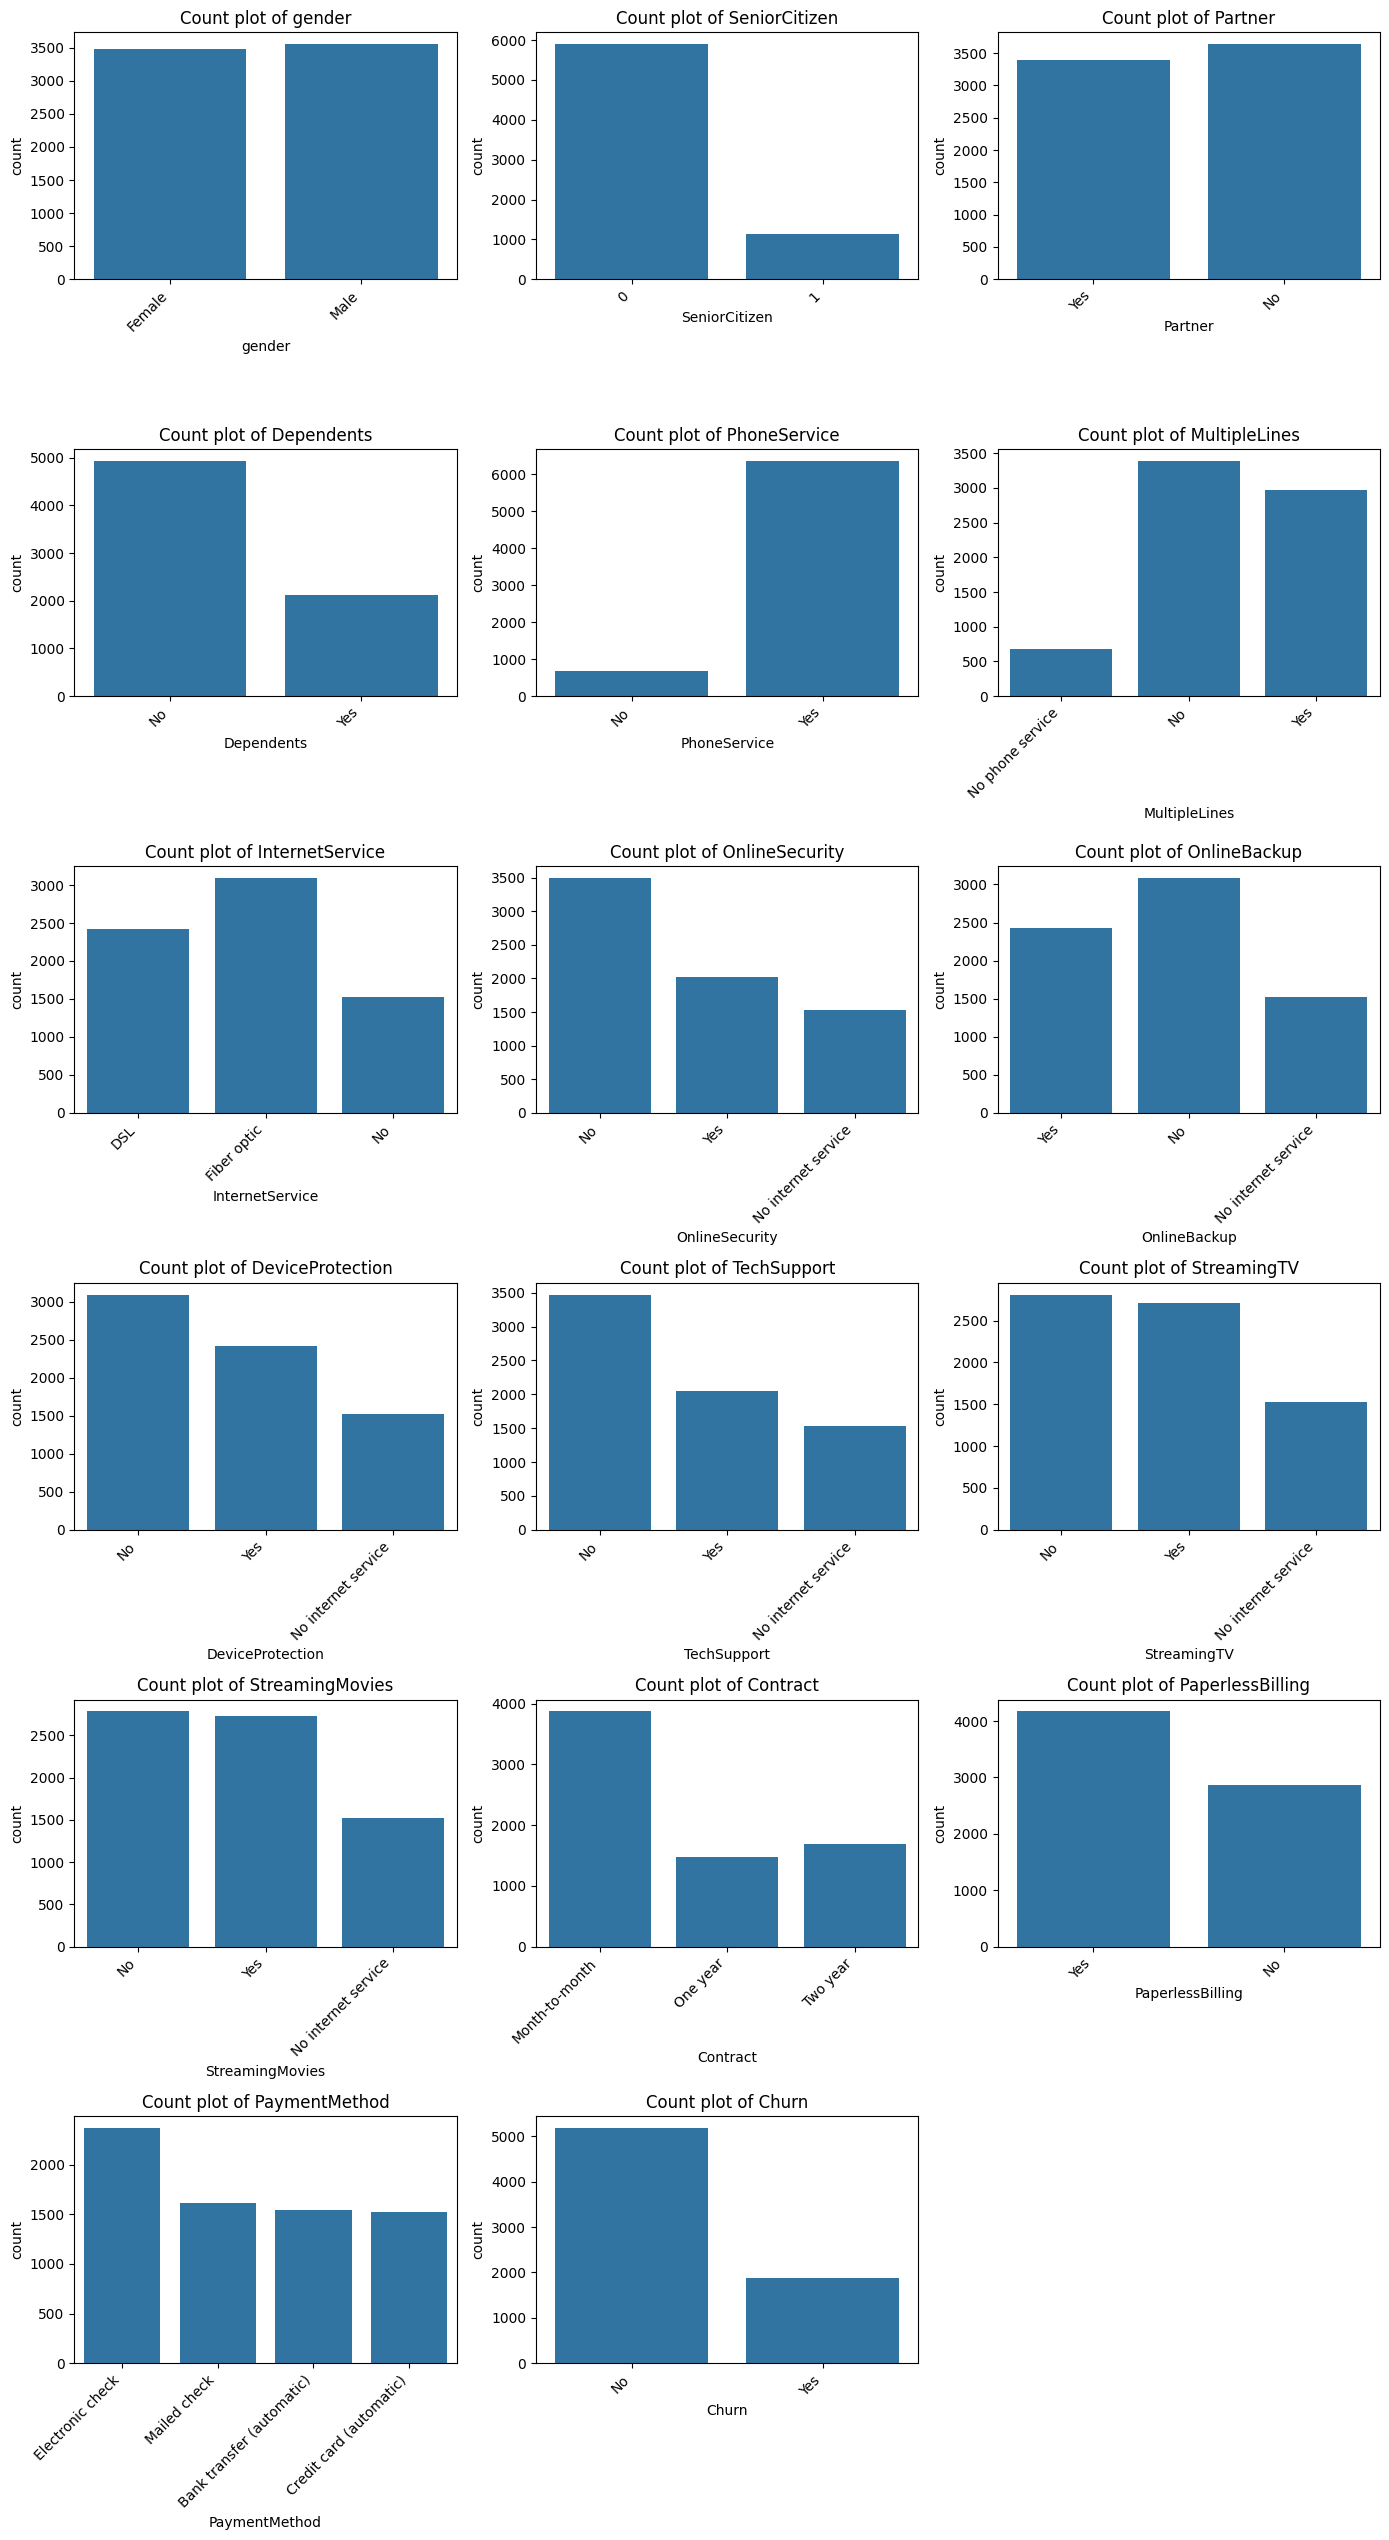

In [15]:
# Número de características categóricas
num_features = len(categorical_features)

# Crear una figura con subplots en dos columnas
fig, axes = plt.subplots(nrows=(num_features + 1) // 3, ncols=3, figsize=(14, num_features * 1.5))

# Aplanar la matriz de ejes para iterar fácilmente
axes = axes.flatten()

# Iterar sobre las características categóricas y los ejes
for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, data=churn, ax=axes[i])
    axes[i].set_title(f'Count plot of {feature}')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')

# Eliminar cualquier subplot vacío
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()

#### Comportamiento de las variables categóricas vs. churn

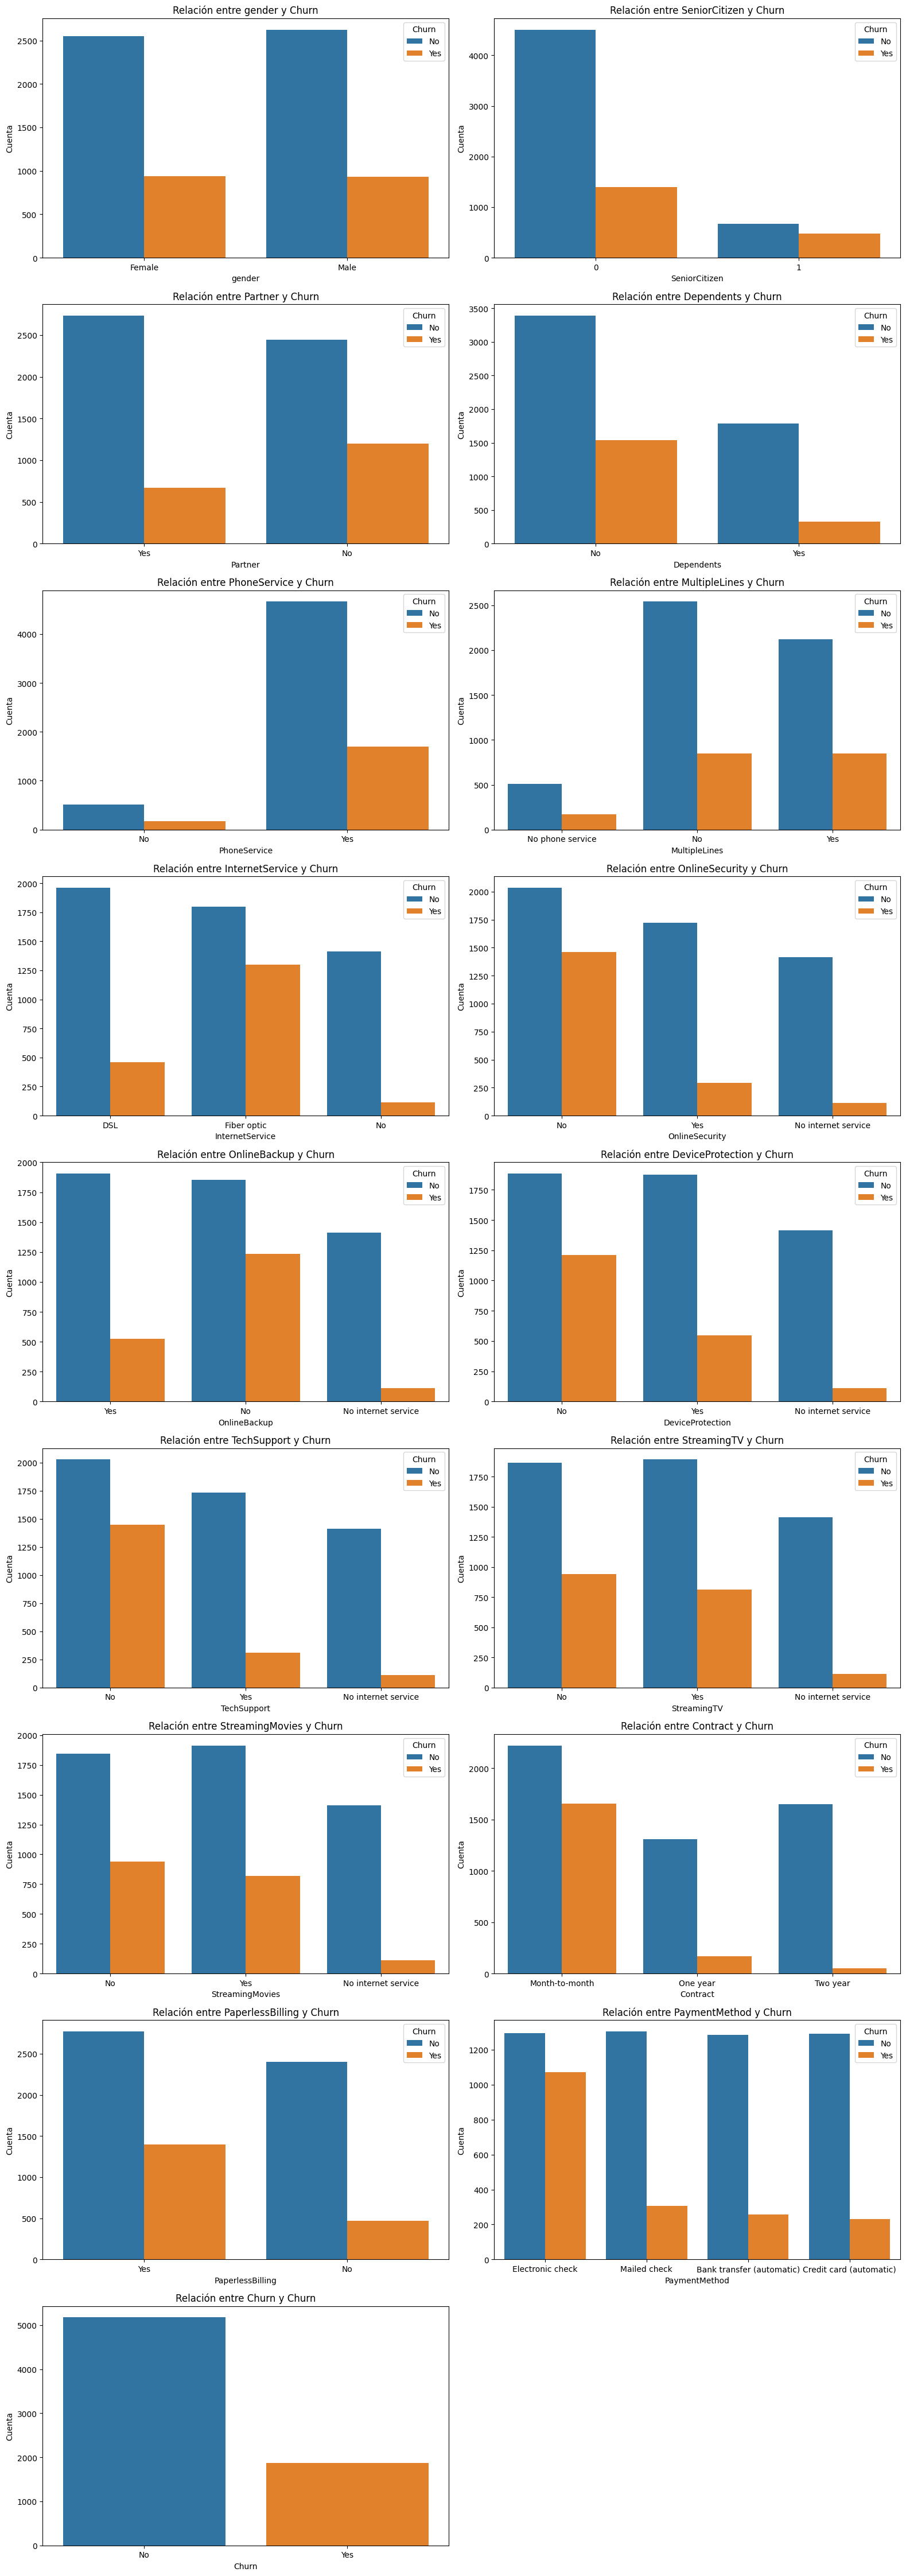

In [16]:
# Número de filas y columnas para los subgráficos
n_cols = 2
n_rows = (len(categorical_features) + 1) // n_cols

# Crear la figura y los subgráficos
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 5))

# Aplanar la matriz de ejes para iterar fácilmente
axes = axes.flatten()

# Iterar sobre las variables categóricas y crear un gráfico de barras para cada una
for i, var in enumerate(categorical_features):
    sns.countplot(data=churn, x=var, hue='Churn', ax=axes[i])
    axes[i].set_title(f'Relación entre {var} y Churn')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Cuenta')

# Eliminar los subgráficos vacíos si el número de variables es impar
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()

#### Relación entre variables numéricas y Churn

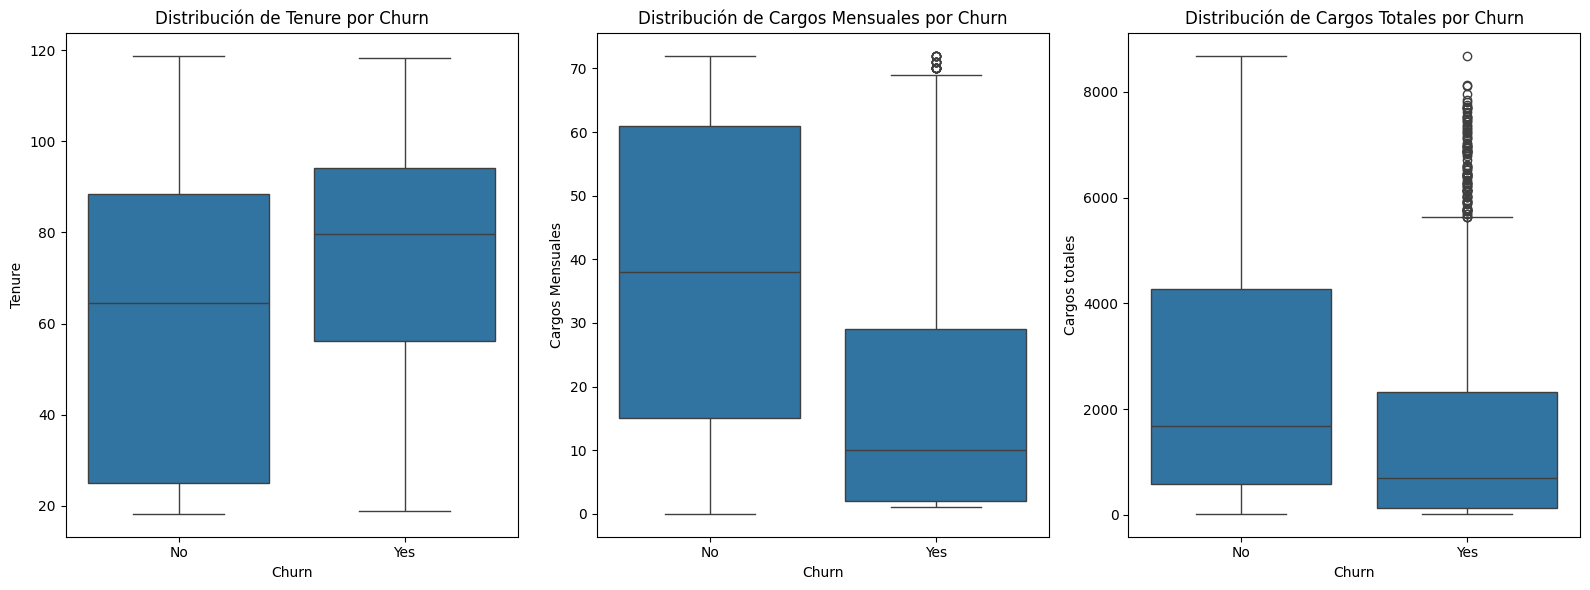

In [17]:
# Crear una figura con una matriz de 1 fila y 2 columnas
fig, axes = plt.subplots(1, 3, figsize=(16, 6))

# Diagrama de caja de tenure y Churn
sns.boxplot(data=churn, x='Churn', y='tenure', ax=axes[1])
axes[0].set_title('Distribución de Tenure por Churn')
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Tenure')

# Diagrama de violín de MonthlyCharges y Churn
sns.boxplot(data=churn, x='Churn', y='MonthlyCharges', ax=axes[0])
axes[1].set_title('Distribución de Cargos Mensuales por Churn')
axes[1].set_xlabel('Churn')
axes[1].set_ylabel('Cargos Mensuales')

# Diagrama de caja de tenure y Churn
sns.boxplot(data=churn, x='Churn', y='TotalCharges', ax=axes[2])
axes[2].set_title('Distribución de Cargos Totales por Churn')
axes[2].set_xlabel('Churn')
axes[2].set_ylabel('Cargos totales')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

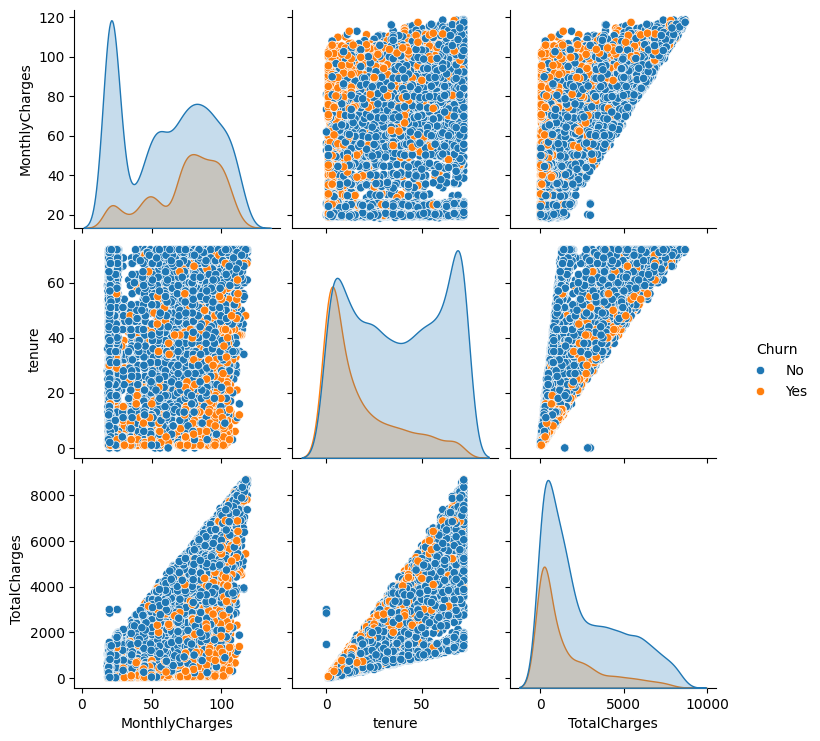

In [18]:
# Gráficos de parejas
sns.pairplot(churn, hue='Churn', vars=numeric_features)
plt.show()

In [19]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.882081
std,0.368612,24.559481,30.090047,2265.156206
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


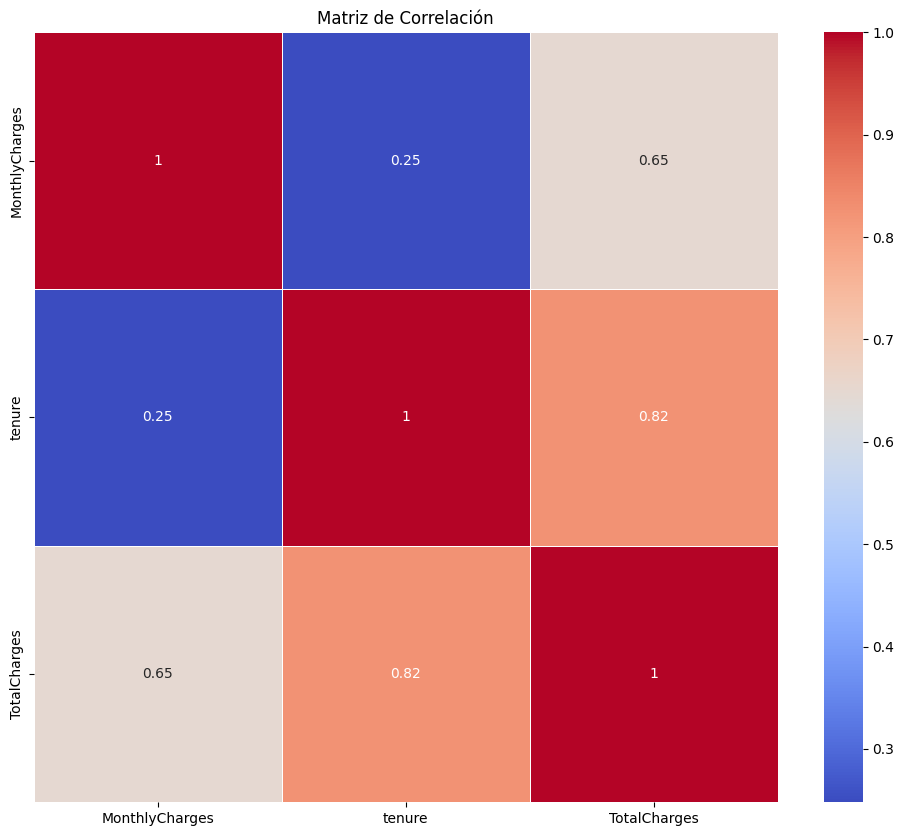

In [20]:
# Matriz de correlación variables numéricas.
plt.figure(figsize=(12, 10))
correlation_matrix = churn[numeric_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

#### Transformación de variables catagóricas (onehotencoder)

In [21]:
# refrescamos la existencia de dos listas con las features dependiendo de su tipo.
numeric_features, categorical_features

(['MonthlyCharges', 'tenure', 'TotalCharges'],
 ['gender',
  'SeniorCitizen',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod',
  'Churn'])

In [22]:
churn_processed = churn.copy()

In [23]:
from sklearn.preprocessing import OneHotEncoder

In [24]:
encoder = OneHotEncoder(sparse_output=False, drop='first')  # `drop='first'` evita la multicolinealidad
encoded = encoder.fit_transform(churn_processed[categorical_features])

In [25]:
column_names = encoder.get_feature_names_out(categorical_features)
df_encoded = pd.DataFrame(encoded, columns=column_names)

In [26]:
# Concatenar con el DataFrame original (sin las columnas categóricas originales)
df_final = pd.concat([churn_processed.drop(columns=categorical_features), df_encoded], axis=1)

In [27]:
#df_final.describe().T

In [28]:
# rutina para limpiar los nombres de las columnas
def clean_column_names(df):
  # Lowercase all column names
  df.columns = df.columns.str.lower()

  # Replace spaces with underscores
  df.columns = df.columns.str.replace(' ', '_')

  # Additional cleaning if needed (e.g., removing special characters)
  df.columns = df.columns.str.replace('[^a-zA-Z0-9_]', '', regex=True)

  return df

In [29]:
#df_final.columns

In [30]:
df_ready  = clean_column_names(df_final)

In [31]:
#df_ready.columns

# 2. Modelado inicial

### 2.1 Funciones de interés y librerías  

In [32]:
from sklearn import ensemble
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

In [33]:
def entrenar_modelo_metricas(model, X_train, X_test, y_train, y_test):
    '''
    Entrena el modelo y calcula métricas.
    
    Inputs: 
        model: instancia del modelo,
        X_train: conjunto de características de entrenamiento,
        X_test: conjunto de características de prueba,
        y_train: conjunto de etiquetas de entrenamiento,
        y_test: conjunto de etiquetas de prueba,
    
    Returns:
        metrics: diccionario con las métricas calculadas
    '''
    # Entrenar el modelo
    model.fit(X_train, y_train)

    # Hacer predicciones
    y_pred = model.predict(X_test)

    metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred, average='weighted'),
    'Recall': recall_score(y_test, y_pred, average='weighted'),
    'F1-Score': f1_score(y_test, y_pred, average='weighted'),
    'ROC-AUC': roc_auc_score(y_test, y_pred, average='weighted')
    }

    confusion = {
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }
    
    return metrics, confusion

### 2.2 Separación train/test  

In [34]:
#df_ready.columns

In [35]:
# separamos todo el dataset (no descartamos variables predictoras)
X = df_ready.drop(columns = 'churn_yes')
y = df_ready.churn_yes

In [36]:
X.shape, y.shape

((7043, 30), (7043,))

In [37]:
# Separamos train y test forzando a que mantenga las proporciones del target tanto en train como en test.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12345, test_size=0.2, stratify=y)

### 2.3 Entrenamiento diverso.  

#### 2.3.1 Funciones relacionadas.  

In [38]:
def plot_confusion_matrices(confusion_matrices):
    # Número de modelos
    num_models = len(confusion_matrices)
    rows = (num_models + 1) // 2  # Ajuste para asegurar que haya suficientes filas
    
    # Crear una figura con subplots
    fig, axes = plt.subplots(rows, 2, figsize=(20, 6 * rows))
    axes = axes.flatten()  # Aplanar el arreglo de ejes para iterar fácilmente
    
    # Iterar sobre cada modelo y su matriz de confusión
    for ax, (model_name, data) in zip(axes, confusion_matrices.items()):
        cm = data['Confusion Matrix']
        
        # Crear un DataFrame para la matriz de confusión
        cm_df = pd.DataFrame(cm, index=['Actual Positive', 'Actual Negative'], columns=['Predicted Positive', 'Predicted Negative'])
        
        # Plotear la matriz de confusión
        sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14}, ax=ax)
        ax.set_title(f'Confusion Matrix for {model_name}')
        ax.set_ylabel('Actual')
        ax.set_xlabel('Predicted')
    
    # Eliminar subplots vacíos si el número de modelos es impar
    if num_models % 2 != 0:
        fig.delaxes(axes[-1])
    
    # Ajustar el layout
    plt.tight_layout()
    plt.show()

#### 2.3.1 Entrenamiento RL, RF, XGB  

In [39]:
model_RL = LogisticRegression()

In [40]:
model_RF = RandomForestClassifier(max_depth = 3)

In [41]:
model_XGB = XGBClassifier(n_estimators = 125, max_depth = 3)

In [42]:
modelos_ml = {
    'Regresión Logística': model_RL,
    'Random Forest': model_RF,
    'XGBoost': model_XGB
}

In [43]:
metrics = {}
confusion_mtx = {}

In [44]:
for modelo_ml, instancia_modelo in modelos_ml.items():
    metricas, confusion = entrenar_modelo_metricas(instancia_modelo, X_train, X_test, y_train, y_test)
    metrics.update({modelo_ml : metricas })
    confusion_mtx.update({modelo_ml : confusion })

# 3. Evaluación Inicial

In [45]:
# Guardamos todas las métricas obtenidas en un DataFrame.
df_resultados = pd.DataFrame(metrics)

# Transponer el DataFrame para que los modelos sean las filas
df_resultados = df_resultados.T

In [46]:
print(df_resultados)

                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
Regresión Logística  0.797729   0.790460  0.797729  0.792978  0.719733
Random Forest        0.777857   0.759950  0.777857  0.751755  0.638756
XGBoost              0.786373   0.779349  0.786373  0.782032  0.707735


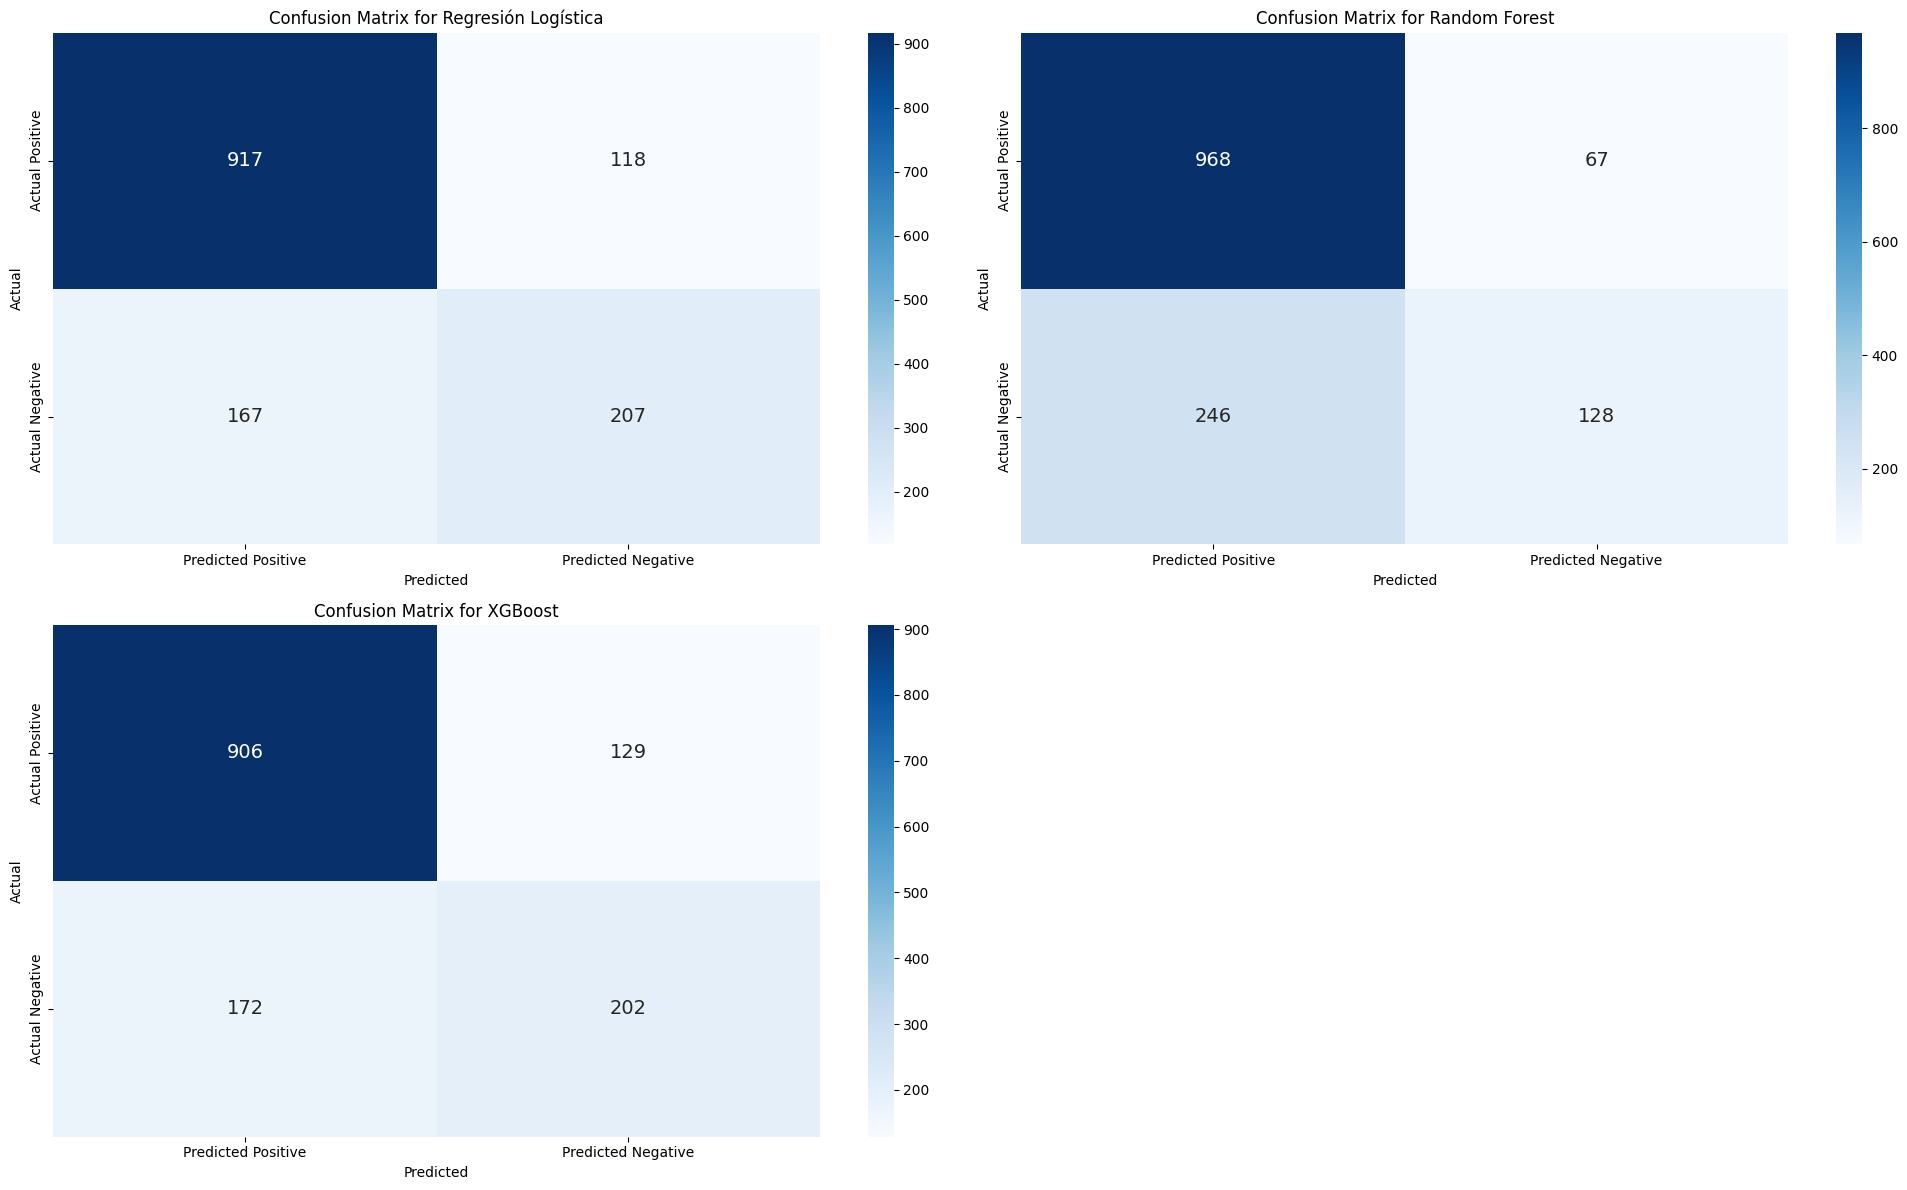

In [47]:
# Plotear las matrices de confusión
plot_confusion_matrices(confusion_mtx)

# 4. Optimización de hiperparámetros

### 4.1 Ejecución de mejores hiperparámetros usando GridSearch sobre XGBoost

In [48]:
# Definir espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [100, 150, 200, 250],
    'max_depth': [None, 5, 10, 20],
    'learning_rate': [0.05, 0.1, 0.2]
}

# Aplicar GridSearchCV al model_XGB
grid_search = GridSearchCV(model_XGB, param_grid, cv=3, scoring='recall', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mejor combinación de hiperparámetros
print("Mejores hiperparámetros:", grid_search.best_params_)
print("Mejor puntuación:", grid_search.best_score_)

Mejores hiperparámetros: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 150}
Mejor puntuación: 0.5344477442166796


### 4.2 Evaluación del modelo con los mejores hiperparámetros de GridSearch sobre XGBoost

In [49]:
model_XGB_enh = XGBClassifier(**grid_search.best_params_)

In [50]:
metricas_enh, confusion_enh = entrenar_modelo_metricas(model_XGB_enh, X_train, X_test, y_train, y_test)
metrics.update({'XGBoost enhanced' : metricas_enh })
confusion_mtx.update({'XGBoost enhanced' : confusion_enh })

In [51]:
# Guardamos todas las métricas obtenidas en un DataFrame.
df_resultados = pd.DataFrame(metrics)

# Transponer el DataFrame para que los modelos sean las filas
df_resultados = df_resultados.T

In [52]:
print(df_resultados)

                     Accuracy  Precision    Recall  F1-Score   ROC-AUC
Regresión Logística  0.797729   0.790460  0.797729  0.792978  0.719733
Random Forest        0.777857   0.759950  0.777857  0.751755  0.638756
XGBoost              0.786373   0.779349  0.786373  0.782032  0.707735
XGBoost enhanced     0.795600   0.787135  0.795600  0.789795  0.713161


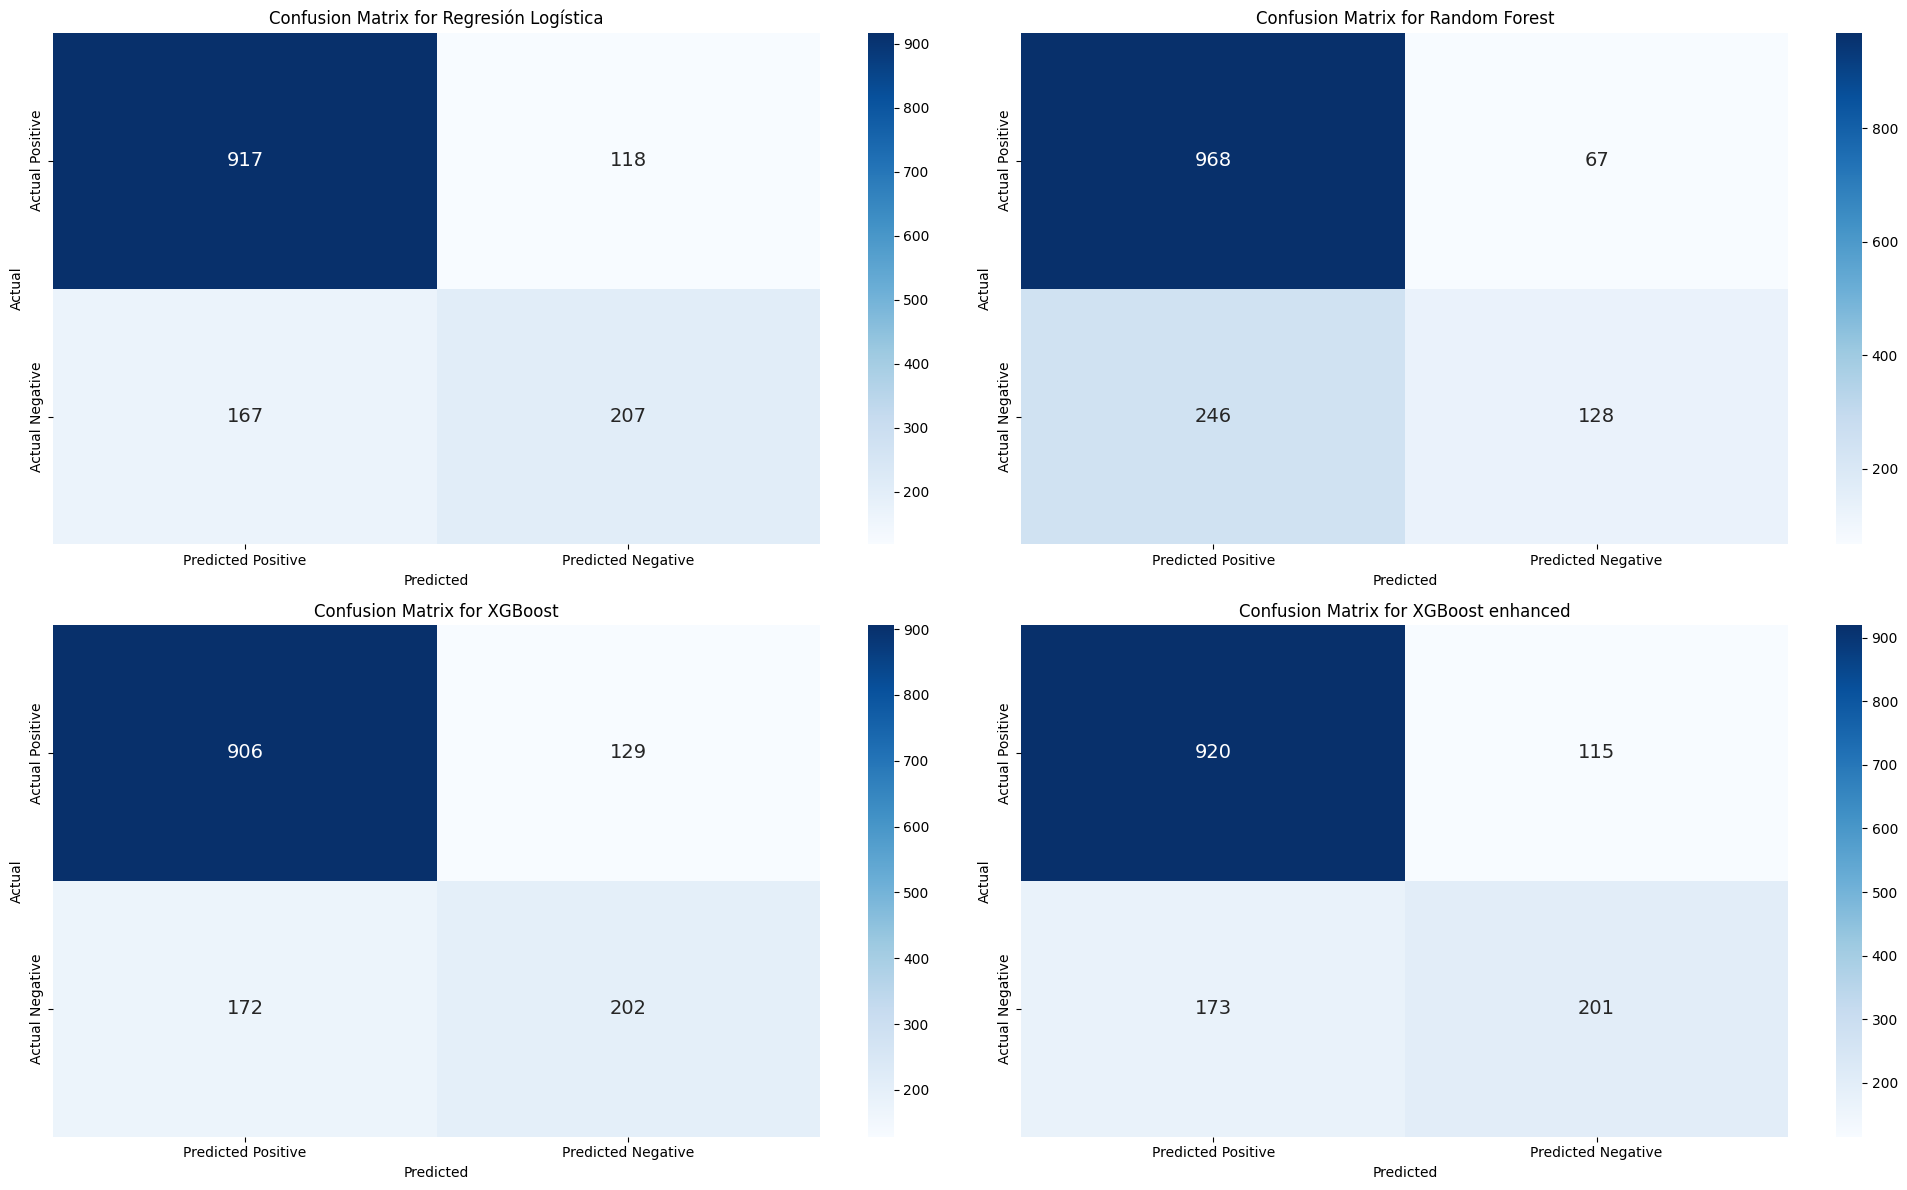

In [53]:
# Plotear las matrices de confusión
plot_confusion_matrices(confusion_mtx)

### 4.3 Importancia de las variables  

In [54]:
# Obtener importancia de las variables
importancias = model_XGB_enh.feature_importances_

# Ordenar de mayor a menor
indices = np.argsort(importancias)[::-1]

importances = {}

# Mostrar importancia de cada variable
for i in range(len(importancias)):
    #print(f"Variable {X_train.columns[indices[i]]}: {importancias[indices[i]]:.4f}")
    importances.update({f"{X_train.columns[indices[i]]}" : importancias[indices[i]]})

In [55]:
df_importancia = pd.DataFrame(list(importances.items()), columns=['index', 'importancia'])

In [56]:
df_importancia

,index,importancia
0,internetservice_fiber_optic,0.357366
1,contract_two_year,0.198547
2,contract_one_year,0.150871
3,internetservice_no,0.057920
4,tenure,0.032792
5,streamingmovies_yes,0.029611
6,streamingtv_yes,0.018793
7,paymentmethod_electronic_check,0.016636
8,techsupport_yes,0.013661
9,paperlessbilling_yes,0.012735


#### 4.3.1 Reducción de variables PCA (BETA)  

In [57]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [58]:
# estandarizamos X para evitar impacto del orden de magnitud en las variables.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [64]:
# instanciamos y aplicamos PCA, la idea peregrina es reducir a 1 dimensión y comparar con la importancia del punto anterior.
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)

In [60]:
print("Varianza explicada por cada componente principal:", pca.explained_variance_ratio_)
print("Varianza explicada acumulada:", np.cumsum(pca.explained_variance_ratio_))

Varianza explicada por cada componente principal: [0.33175044]
Varianza explicada acumulada: [0.33175044]


In [61]:
componentes = pd.DataFrame(pca.components_, columns=X.columns, index=['PC1'])
comp_trans = componentes.head().T.reset_index()

In [62]:
comp_trans_ord = comp_trans.sort_values(by=['PC1'])

In [63]:
# Realizamos el merge utilizando la columna 'index'
df3 = pd.merge(comp_trans_ord, df_importancia, on='index', how='inner')

# 5. Modelo de stacking

# 6. Comparación de resultados

# 7. Interpretabilidad del modelo

# 8. Presentación a negocio